# Stock Analysis Experiments

## Setup

Install yfinance
```
$ conda install -c conda-forge yfinance
```

In [1]:
import matplotlib.pyplot as plt

from core.ticker import Ticker, TickerManager
from core.chart import Chart, Indicator
from ui.ui_matplotlib import MPLHelper

## Load Stock Price Data

The `Ticker` class pulls price/volume data from the web via the yfinance package and saves it to disk for faster loading in the future.

The following cell demonstrates the form this data takes.

In [2]:
ticker_manager = TickerManager()
await ticker_manager.load(["GOOG"])

goog_ticker = ticker_manager.get_ticker("GOOG")
goog_ticker.print_info()
goog_chart = Chart(goog_ticker)

todays_date = goog_ticker.get_date(as_str=True)
three_days_ago = goog_ticker.get_date(days_offset=-3, as_str=True)
print(f"Today is {todays_date}, three days ago was {three_days_ago}")

goog_df = goog_ticker.dataframe
print(f"Most recent close on {goog_df.index[-1]} is {goog_df.iloc[-1].Close}")

print("size of GOOG DF", goog_chart.num_entries)

INFO:core.ticker:got GOOG from pickle
INFO:core.ticker:now scraping, start date = 2023-5-20, end date = 2023-5-22
INFO:core.ticker:got GOOG from scraping, start date = 2023-5-20, end date = 2023-5-22


GOOG: No data found for this date range, symbol may be delisted
Symbol is: GOOG
First five entries:
--------
                                Open       High        Low      Close  \
Date                                                                    
2013-05-22 00:00:00-04:00  22.479740  22.647860  22.089205  22.152468   
2013-05-23 00:00:00-04:00  21.843126  22.165916  21.768408  21.987335   
2013-05-24 00:00:00-04:00  21.799789  21.888456  21.693935  21.751471   
2013-05-28 00:00:00-04:00  22.005020  22.220213  21.927809  21.949478   
2013-05-29 00:00:00-04:00  21.810997  21.867785  21.526564  21.626688   

                                Volume  Dividends  Stock Splits  Adj Close  
Date                                                                        
2013-05-22 00:00:00-04:00  102807910.0        0.0           0.0        NaN  
2013-05-23 00:00:00-04:00   91345105.0        0.0           0.0        NaN  
2013-05-24 00:00:00-04:00   92216359.0        0.0           0.0        

In [3]:
# Temporary cell
await ticker_manager.load(["SPY"])

spy_ticker = ticker_manager.get_ticker("SPY")
spy_ticker.print_info()
spy_chart = Chart(spy_ticker)
spy_chart.add_sma(30)

print("num entries for SPY are", spy_chart.num_entries)
spy_df = spy_chart.dataframe
print("SMA-30 value is", spy_df.iloc[30]["SMA-30"])


INFO:core.ticker:got SPY from pickle
INFO:core.ticker:now scraping, start date = 2023-5-20, end date = 2023-5-22
INFO:core.ticker:got SPY from scraping, start date = 2023-5-20, end date = 2023-5-22


SPY: No data found for this date range, symbol may be delisted
Symbol is: SPY
First five entries:
--------
                                 Open        High         Low       Close  \
Date                                                                        
2013-05-23 00:00:00-04:00  136.426612  137.880965  136.243778  137.498672   
2013-05-24 00:00:00-04:00  136.684208  137.440474  136.276984  137.382294   
2013-05-28 00:00:00-04:00  138.819992  139.434980  137.797794  138.205017   
2013-05-29 00:00:00-04:00  137.473674  137.789480  136.576129  137.307465   
2013-05-30 00:00:00-04:00  137.415549  138.446053  137.307507  137.814453   

                                Volume  Dividends  Stock Splits  \
Date                                                              
2013-05-23 00:00:00-04:00  211064400.0        0.0           0.0   
2013-05-24 00:00:00-04:00  151573900.0        0.0           0.0   
2013-05-28 00:00:00-04:00  143679800.0        0.0           0.0   
2013-05-29 00:00:0

## Plot Chart Using matplotlib

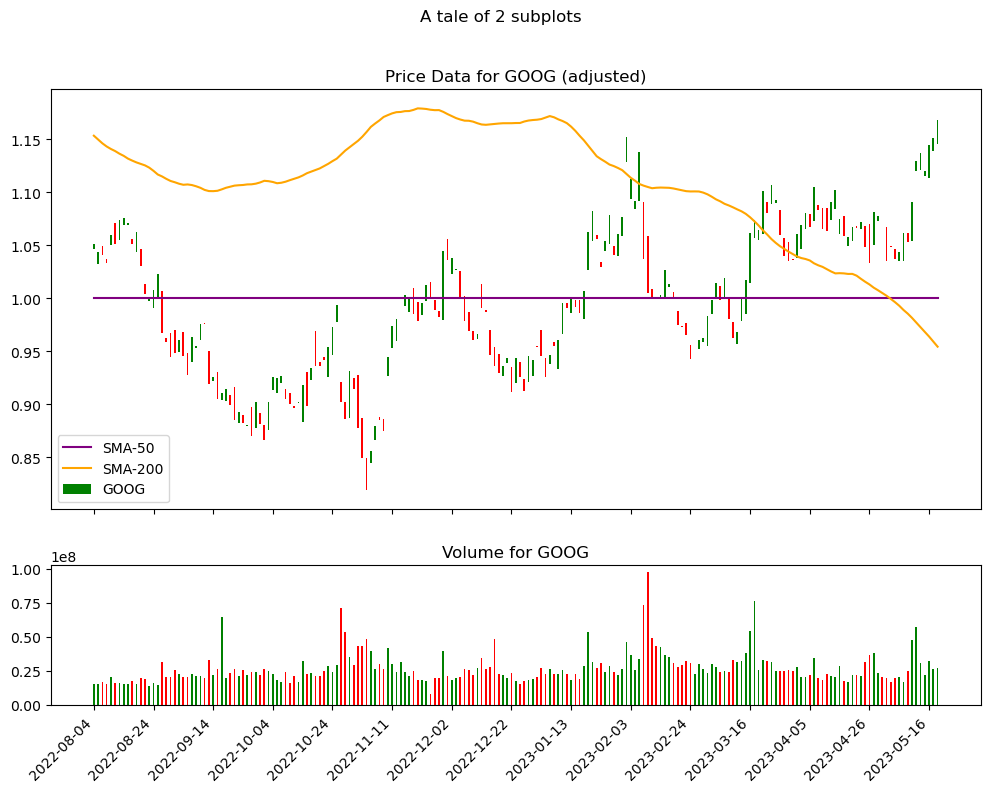

In [4]:
my_chart = goog_chart
my_chart.add_sma(50)
my_chart.add_sma(200)
mpl_helper = MPLHelper(my_chart)
mpl_helper.show_adjusted(-200, -1, 50)

In [5]:
lowest_index = goog_chart.ticker.get_index_of_date("2022-10-05")
highest_index = goog_chart.ticker.get_index_of_date("2023-01-17")
print("**** yo")
for i in range(lowest_index, highest_index):
    print(f"profit test for date {goog_chart.ticker.get_date_of_index(i)} is {goog_chart.profit_test(i, 0.05, 0.1, 10)}")

**** yo
profit test for date 2022-10-05 00:00:00-04:00 is False
profit test for date 2022-10-06 00:00:00-04:00 is False
profit test for date 2022-10-07 00:00:00-04:00 is False
profit test for date 2022-10-10 00:00:00-04:00 is False
profit test for date 2022-10-11 00:00:00-04:00 is False
profit test for date 2022-10-12 00:00:00-04:00 is False
profit test for date 2022-10-13 00:00:00-04:00 is False
profit test for date 2022-10-14 00:00:00-04:00 is False
profit test for date 2022-10-17 00:00:00-04:00 is False
profit test for date 2022-10-18 00:00:00-04:00 is False
profit test for date 2022-10-19 00:00:00-04:00 is False
profit test for date 2022-10-20 00:00:00-04:00 is False
profit test for date 2022-10-21 00:00:00-04:00 is False
profit test for date 2022-10-24 00:00:00-04:00 is False
profit test for date 2022-10-25 00:00:00-04:00 is False
profit test for date 2022-10-26 00:00:00-04:00 is False
profit test for date 2022-10-27 00:00:00-04:00 is False
profit test for date 2022-10-28 00:00:00